# Create Dataset
Generates a simple synthetic dataset for binary classification using NumPy:

1. **Function `create_dataset`**: This function creates a dataset with `n` samples (default is 20).
    - It generates `n` random points in 2D space, where each coordinate is between 0 and 1.
    - It assigns a label to each point: if the first coordinate is greater than the second, the label is 1; otherwise, it is -1.
2. **Generate Data**: The function is called to create the dataset, returning the features (`X`) and labels (`y`).

In [1]:
import numpy as np

def create_dataset(n=20):
    X = np.random.uniform(size=(n, 2))
    y = np.array(X[:, 0] > X[:, 1], dtype=int) * 2 - 1
    return X, y

X, y = create_dataset()
print(X)
print(y)

[[0.69415085 0.05519955]
 [0.50484747 0.1270045 ]
 [0.64171552 0.19615451]
 [0.94405134 0.8021294 ]
 [0.84206475 0.97570352]
 [0.80597979 0.2573208 ]
 [0.77214409 0.93355723]
 [0.10136185 0.3186949 ]
 [0.58268996 0.7687919 ]
 [0.18871017 0.71277353]
 [0.37007811 0.54760183]
 [0.16453713 0.75470801]
 [0.22561047 0.54112889]
 [0.38990635 0.45995791]
 [0.17311351 0.55007793]
 [0.81051305 0.71530267]
 [0.25141538 0.49509071]
 [0.55582173 0.35198846]
 [0.79283393 0.27584083]
 [0.23288693 0.95151443]]
[ 1  1  1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1  1 -1]


# Plotting the Dataset and a Linear Separator (Hyperplane)
Defines a function to visualize the generated dataset:

1. **Import Matplotlib**: The code imports the `matplotlib.pyplot` library for plotting.
2. **Function `plot_dataset`**: This function takes the features (`X`) and labels (`y`) as input and creates a scatter plot:
    - Each point is colored according to its label.
    - The plot is limited to the range [0, 1] for both axes, matching the data generation range.
3. **Function `plot_hyperplane`**: Given a vector `[w1, w2]`, this function plots the line defined by the equation `w1 * x + w2 * y = 0`.
    - It calculates two x-values (0 and 1) and computes the corresponding y-values for the line.
    - The line is plotted in red.
4. **Display the Plot**: The function is called with the generated data, and `plt.show()` displays the plot.

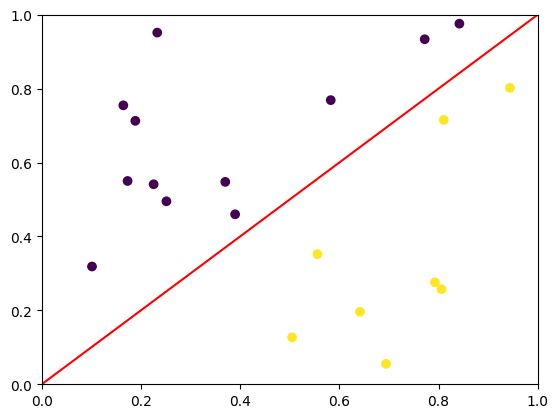

In [2]:
import matplotlib.pyplot as plt

def plot_dataset(X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.xlim(0, 1)
    plt.ylim(0, 1)

def plot_hyperplane(vector):
    xs = np.array([0, 1])
    ys = -(vector[0] * xs) / vector[1]
    plt.plot(xs, ys, 'r-')

plot_dataset(X, y)
plot_hyperplane(vector=[1, -1])
plt.show()

# Simple Linear Classifier
Implements a simple linear classifier, for comparison with the perceptron:

1. **SimpleClassifier Class**:
    - Inherits from scikit-learn's `BaseEstimator` and `ClassifierMixin` for compatibility.
    - `fit`: Stores the unique class labels from the training data (required by scikit-learn API).
    - `predict`: Uses a fixed weight vector `[1, -1]` to compute a linear combination of the input features. The sign function is applied to produce the predicted class (+1 or -1).

In [3]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score
import numpy as np

# Sign function: returns 1 if a >= 0, else -1
def sign(a):
    return (a >= 0) * 2 - 1

class SimpleClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self):
        pass

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        return self

    def predict(self, X):
        # Predicts using a fixed vector [1, -1] as weights
        vector = np.array([1, -1])
        y_pred = X @ vector
        return sign(y_pred)

# Train and evaluate the classifier
predictions = SimpleClassifier().fit(X, y).predict(X)
print(accuracy_score(y, predictions))

1.0


# PerceptronPLA: Perceptron Learning Algorithm

This section implements the Perceptron Learning Algorithm (PLA) as a custom classifier compatible with scikit-learn:

- **Class Structure**: `PerceptronPLA` inherits from scikit-learn base classes for easy integration.
- **Initialization**: The number of training epochs is set (default: 100).
- **Training (`fit` method)**:
  - The weight vector is initialized randomly.
  - For each epoch, the data indices are shuffled.
  - For each sample, the model predicts the label and computes the error.
  - If the prediction is incorrect, the weights are updated to reduce the error.
  - Training stops early if all samples are classified correctly (zero cost).
- **Prediction (`predict` method)**: Uses the learned weights to predict labels for new data.
- **Usage Example**: The model is trained on the dataset, predictions are made, and the final weights, predictions, and accuracy are printed.

This demonstrates how the perceptron algorithm iteratively adjusts its weights to find a linear separator for the data.

In [4]:
class PerceptronPLA(BaseEstimator, ClassifierMixin): # PLA = Perceptron Learning Algorithm
  def __init__(self, epochs=100):
    self.epochs = range(epochs)  # Set the number of training epochs

  def fit(self, X, y):
    self.w = np.random.uniform(size=X.shape[1])*2-1  # Initialize weights randomly between -1 and 1
    print("Initial weights:", self.w)  # Print initial weights
    
    for epoch in self.epochs:  # Loop over epochs
      cost = 0  # Initialize cost for this epoch
      idx = np.arange(len(y))  # Create an array of sample indices
      np.random.shuffle(idx)  # Shuffle the indices for stochastic updates
      for i in idx:  # Loop over each sample
        ypred = sign(X[i] @ self.w)  # Predict label using current weights
        error = y[i]-ypred  # Compute prediction error
        print(f"Epoch {epoch} Sample {i}: X[i]={X[i]} Expected {y[i]}, Predicted {ypred}, Error {error}, Weights: {self.w}")  # Print prediction details
        if error:
          delta = error*X[i]  # Calculate the change to be applied to weights
          print(f"Weights delta: {delta}")  # Print the change in weights
          self.w += delta  # Adjusts the weights
          cost += error**2  # Accumulate squared error
      if cost == 0:  # Stop early if no errors (perfect classification)
        break
    return self  # Return the trained model

  def predict(self, X):
    return sign(X @ self.w)  # Predict labels for input data

model = PerceptronPLA()  # Create perceptron model
model.fit(X, y)  # Train the model
ypred = model.predict(X)  # Predict on training data
print(model.w)  # Print final weights
print(ypred)  # Print predictions
print(accuracy_score(y, ypred))  # Print accuracy score

Initial weights: [-0.28958264 -0.21560279]
Epoch 0 Sample 5: X[i]=[0.80597979 0.2573208 ] Expected 1, Predicted -1, Error 2, Weights: [-0.28958264 -0.21560279]
Weights delta: [1.61195957 0.51464161]
Epoch 0 Sample 17: X[i]=[0.55582173 0.35198846] Expected 1, Predicted 1, Error 0, Weights: [1.32237693 0.29903882]
Epoch 0 Sample 19: X[i]=[0.23288693 0.95151443] Expected -1, Predicted 1, Error -2, Weights: [1.32237693 0.29903882]
Weights delta: [-0.46577386 -1.90302886]
Epoch 0 Sample 10: X[i]=[0.37007811 0.54760183] Expected -1, Predicted -1, Error 0, Weights: [ 0.85660307 -1.60399005]
Epoch 0 Sample 3: X[i]=[0.94405134 0.8021294 ] Expected 1, Predicted -1, Error 2, Weights: [ 0.85660307 -1.60399005]
Weights delta: [1.88810268 1.60425881]
Epoch 0 Sample 9: X[i]=[0.18871017 0.71277353] Expected -1, Predicted 1, Error -2, Weights: [2.74470575e+00 2.68759034e-04]
Weights delta: [-0.37742035 -1.42554706]
Epoch 0 Sample 7: X[i]=[0.10136185 0.3186949 ] Expected -1, Predicted -1, Error 0, Weigh

# Evaluating the Model on a Large Test Dataset

Evaluates the perceptron model's performance on new, unseen data:

- `create_dataset(1000)`: Generates a test set with 1000 random samples and their labels.
- `model.predict(Xtest)`: Predicts the labels for the test data using the trained model.
- `accuracy_score(ytest, ypred)`: Computes and prints the accuracy by comparing predicted and true labels.

This step measures how well the trained perceptron generalizes to data it has not seen before.

In [5]:
Xtest, ytest = create_dataset(1000)
ypred = model.predict(Xtest)
print(accuracy_score(ytest, ypred))

0.999


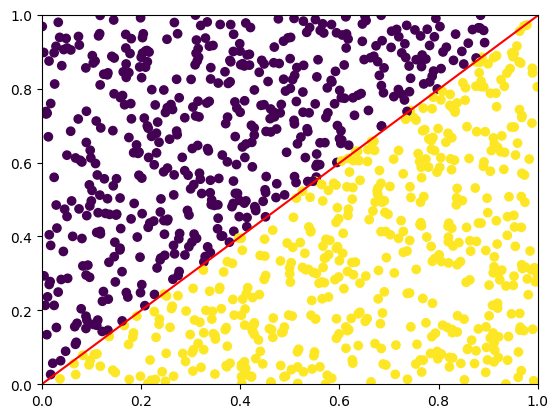

In [6]:
plot_dataset(Xtest, ytest)
plot_hyperplane(vector=model.w)
plt.show()

# Perceptron (Vectorized Implementation)

This section implements a perceptron classifier using a vectorized approach:

- **Class Definition**: `Perceptron` inherits from scikit-learn's base classes for compatibility.
- **Initialization**: The number of training epochs is set (default: 100).
- **fit Method**:
  - Initializes the weight vector randomly.
  - For each epoch, predicts all labels at once using a vectorized dot product.
  - Computes the error for all samples and updates the weights in a single step using matrix multiplication.
  - If all samples are classified correctly (cost is zero), training stops early.
- **predict Method**: Uses the learned weights to predict labels for new data.
- **Usage**: The model is trained on the dataset, predictions are made, and the final weights, predictions, and accuracy are printed.

This vectorized implementation is more efficient than updating weights one sample at a time, and demonstrates how linear algebra can simplify machine learning algorithms.

In [7]:
class Perceptron(BaseEstimator, ClassifierMixin):
    def __init__(self, epochs=100):
        self.epochs = range(epochs)  # Number of training epochs

    def fit(self, X, y):
        self.w = np.random.uniform(size=X.shape[1]) * 2 - 1  # Initialize weights randomly in [-1, 1] for each feature
        print("Initial weights:", self.w)  # Print initial weights
        for epoch in self.epochs:  # Vectorized training loop
            y_pred = sign(X @ self.w)  # Predict all labels at once using current weights
            error = y - y_pred  # Compute error for all samples
            delta = X.T @ error  # Calculate weight delta (vectorized update)
            print(f"Epoch {epoch}: Predictions={y_pred}, Weight delta={delta}, Weights={self.w}")  # Print predictions, weight delta, and current weights for this epoch
            self.w += delta  # Update weights in a single step using the sum of errors weighted by input features
            cost = np.sum(error ** 2)  # Calculate cost (sum of squared errors) to check for convergence
            if cost == 0:  # Stop early if all samples are classified correctly
                break
        return self  # Return the trained model

    def predict(self, X):
        return sign(X @ self.w)  # Predict labels for input data using learned weights

model = Perceptron()  # Create and train the perceptron model
model.fit(X, y)
y_pred = model.predict(X)  # Predict on training data
print(model.w)  # Print final weights
print(y_pred)  # Print predictions
print(accuracy_score(y, y_pred))  # Print accuracy

Initial weights: [-0.83871478  0.99961677]
Epoch 0: Predictions=[-1 -1 -1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1], Weight delta=[ -0.59833885 -13.49218429], Weights=[-0.83871478  0.99961677]
Epoch 1: Predictions=[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1], Weight delta=[11.49982734  5.56188145], Weights=[ -1.43705363 -12.49256752]
Epoch 2: Predictions=[ 1  1  1  1  1  1  1 -1  1 -1 -1 -1 -1  1 -1  1 -1  1  1 -1], Weight delta=[-5.1736103 -6.2760211], Weights=[10.06277371 -6.93068607]
Epoch 3: Predictions=[ 1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1], Weight delta=[4.62077223 3.73884108], Weights=[  4.8891634  -13.20670717]
Epoch 4: Predictions=[ 1  1  1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1  1 -1], Weight delta=[0. 0.], Weights=[ 9.50993563 -9.46786609]
[ 9.50993563 -9.46786609]
[ 1  1  1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1  1 -1]
1.0


# Evaluating the Model on a Large Test Dataset

In [8]:
Xtest, ytest = create_dataset(1000)
ypred = model.predict(Xtest)
print(accuracy_score(ytest, ypred))

0.996


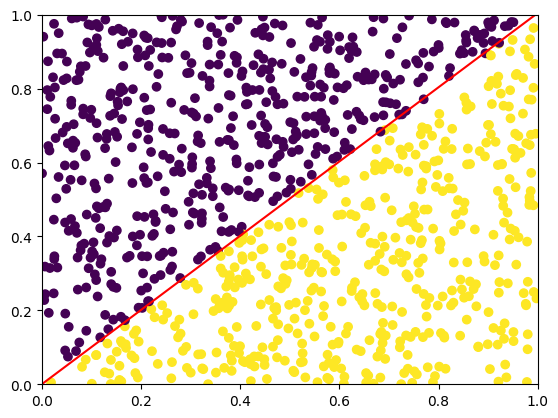

In [9]:
plot_dataset(Xtest, ytest)
plot_hyperplane(vector=model.w)
plt.show()

# Custom Dataset Generation with Adjustable Slope

This code defines a function to generate a synthetic dataset for binary classification, allowing control over the orientation of the separating boundary:

1. **Function `create_dataset`**:
    - **Parameters**:
        - `n`: Number of samples to generate (default: 20).
        - `slope`: A list or array that scales each feature dimension, controlling the orientation of the separating line (default: `[2, 1]`).
    - **Process**:
        - Generates `n` random 2D points (`X`) with values between 0 and 1.
        - Multiplies each feature by its corresponding slope value to create an auxiliary array (`AUX`).
        - Assigns labels (`y`) based on whether the first scaled coordinate is greater than the second. Labels are set to +1 or -1.
    - **Returns**: The features (`X`) and labels (`y`).

2. **Usage**:
    - Calls `create_dataset()` to generate data.
    - Plots the dataset using `plot_dataset(X, y)` and displays it with `plt.show()`.

This approach allows you to experiment with different slopes, changing the orientation of the decision boundary for classification tasks.

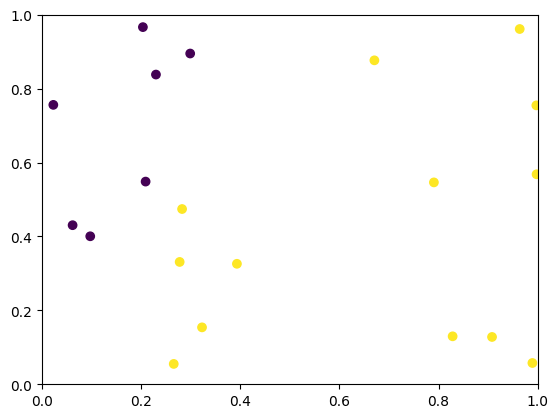

In [10]:
def create_dataset(n=20, slope=[2,1]):
  X = np.random.uniform(size=(n,2))
  AUX = X * np.array(slope)
  y = np.array(AUX[:,0]>AUX[:,1], dtype=int)*2-1
  return X, y

X, y = create_dataset()
plot_dataset(X, y)
plt.show()

In [11]:
model = Perceptron()
model.fit(X, y)
ypred = model.predict(X)
print(model.w)
print(ypred)
print(accuracy_score(y, ypred))

Initial weights: [-0.35521022 -0.66682107]
Epoch 0: Predictions=[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1], Weight delta=[17.37907491 10.7247446 ], Weights=[-0.35521022 -0.66682107]
Epoch 1: Predictions=[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1], Weight delta=[-2.25309704 -9.66897423], Weights=[17.02386468 10.05792353]
Epoch 2: Predictions=[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1], Weight delta=[-2.25309704 -9.66897423], Weights=[14.77076764  0.3889493 ]
Epoch 3: Predictions=[ 1  1  1 -1 -1 -1  1  1  1 -1 -1  1  1  1 -1 -1  1  1  1 -1], Weight delta=[0.56597332 0.94838581], Weights=[12.51767061 -9.28002493]
Epoch 4: Predictions=[ 1  1  1 -1 -1 -1  1  1  1 -1 -1  1  1  1 -1 -1  1  1  1 -1], Weight delta=[0.56597332 0.94838581], Weights=[13.08364392 -8.33163912]
Epoch 5: Predictions=[ 1  1  1 -1  1 -1  1  1  1 -1 -1  1  1  1 -1 -1  1  1  1 -1], Weight delta=[0. 0.], Weights=[13.64961724 -7.38325331]
[13.64961724 -7.38325331]
[ 1  1  1 -1  1 -1  1  1  1 -1 -1  1  1  1 -1

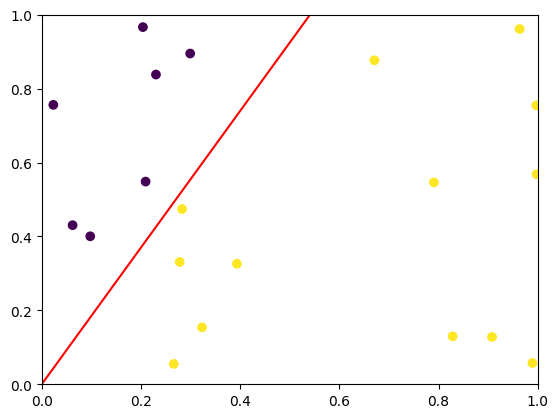

In [12]:
plot_dataset(X, y)
plot_hyperplane(vector=model.w)
plt.show()

# Evaluating the Model on a Large Test Dataset

0.982


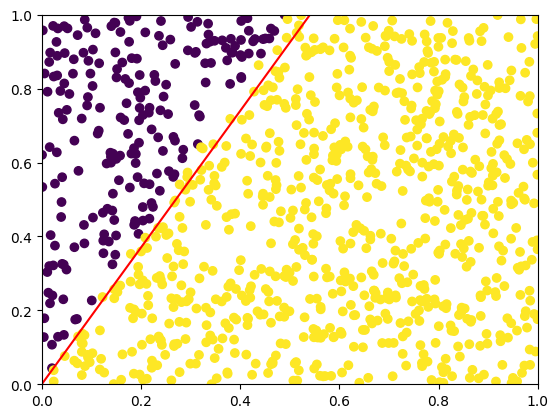

In [13]:
Xtest, ytest = create_dataset(1000)
ypred = model.predict(Xtest)
print(accuracy_score(ytest, ypred))
plot_dataset(Xtest, ytest)
plot_hyperplane(vector=model.w)
plt.show()